# ERCOT Grid Regime Classification — EDA
Exploring merged dataset 2021-2025 to understand price patterns, 
feature relationships, data quality, and regime label thresholds.

In [4]:
# EDA

# Read in merged file
import pandas as pd
import matplotlib.pyplot as plt
import os


PROJECT_PATH = '/Users/kamilmadey/Desktop/ercot_forecasting_project/'
raw_path = os.path.join(PROJECT_PATH, 'data', 'raw')
interim_path = os.path.join(PROJECT_PATH, 'data', 'interim')

df = pd.read_parquet(interim_path + '/merged_all_data.parquet')

In [5]:
df.isnull().sum()

timestamp                     0
RT_price                    309
DAM_price                   389
hub_load                    196
load_total                  196
temperature                   0
humidity                      0
windspeed                     0
precipitation                 0
TotalResourceMWZoneWest    3688
TotalResourceMW               0
PVGRPP_SYSTEM_WIDE            5
STPPF_SYSTEM_WIDE             5
COP_HSL_SYSTEM_WIDE          20
WGRPP_LZ_WEST                 5
STWPF_LZ_WEST                 5
COP_HSL_LZ_WEST               5
WGRPP_SYSTEM_WIDE             5
West                          5
SystemTotal                   5
RT_DAM_spread               698
dtype: int64

In [6]:
# Light GBM can handle small percentage of nulls
# worth looking into Outages

outages = pd.read_csv(raw_path + "/ERCOT_outages_2021-2023.csv")
outages2 = pd.read_csv(raw_path + "/ERCOT_outages_2023-2025.csv")

print('Outages 2021-2023:' , outages.isna().sum())

print('Outages 2023-2025:' , outages2.isna().sum())

Outages 2021-2023: Date                                        0
HourEnding                                  0
TotalResourceMWZoneSouth               265341
TotalResourceMWZoneNorth               265341
TotalResourceMWZoneWest                265341
TotalResourceMWZoneHouston             265341
TotalIRRMWZoneSouth                    265341
TotalIRRMWZoneNorth                    265341
TotalIRRMWZoneWest                     265341
TotalIRRMWZoneHouston                  265341
TotalNewEquipResourceMWZoneSouth       265341
TotalNewEquipResourceMWZoneNorth       265341
TotalNewEquipResourceMWZoneWest        265341
TotalNewEquipResourceMWZoneHouston     265341
TotalResourceMW                       1594418
TotalIRRMW                            1594418
TotalNewEquipResourceMW               1594418
dtype: int64
Outages 2023-2025: Date                                  0
HourEnding                            0
TotalResourceMWZoneSouth              0
TotalResourceMWZoneNorth              0
TotalRe

In [7]:
# Outages from 2021 have nulls:
print('outage nulls:', outages[outages['TotalIRRMWZoneWest'].isna()]['Date'].min(), '→', outages[outages['TotalIRRMWZoneWest'].isna()]['Date'].max())

outage nulls: 01/01/2021 → 06/03/2021


In [8]:
#ERCOT didn't seem to have data for individual zones until 06/04/2021. Total outage still available. Light GBM can handle nulls, can address for other models in feature eng

outages['Date'] = pd.to_datetime(outages['Date'])
outages[outages['Date'] <= '2021-06-03']

,Date,HourEnding,TotalResourceMWZoneSouth,TotalResourceMWZoneNorth,TotalResourceMWZoneWest,TotalResourceMWZoneHouston,TotalIRRMWZoneSouth,TotalIRRMWZoneNorth,TotalIRRMWZoneWest,TotalIRRMWZoneHouston,TotalNewEquipResourceMWZoneSouth,TotalNewEquipResourceMWZoneNorth,TotalNewEquipResourceMWZoneWest,TotalNewEquipResourceMWZoneHouston,TotalResourceMW,TotalIRRMW,TotalNewEquipResourceMW
1105907,2021-05-27,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10679.0,4972.0,3649.0
1105908,2021-05-27,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10679.0,4972.0,3649.0
1105909,2021-05-27,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10679.0,4628.0,3649.0
1105910,2021-05-27,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10679.0,4189.0,3649.0
1105911,2021-05-27,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10679.0,4044.0,3649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408092,2021-01-02,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6879.0,3380.0,1772.0
1408093,2021-01-02,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6879.0,3380.0,1772.0
1408094,2021-01-02,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6879.0,3380.0,1772.0
1408095,2021-01-02,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6879.0,3380.0,1772.0


In [9]:
# Distributions 

df.describe()

,timestamp,RT_price,DAM_price,hub_load,load_total,temperature,humidity,windspeed,precipitation,TotalResourceMWZoneWest,...,PVGRPP_SYSTEM_WIDE,STPPF_SYSTEM_WIDE,COP_HSL_SYSTEM_WIDE,WGRPP_LZ_WEST,STWPF_LZ_WEST,COP_HSL_LZ_WEST,WGRPP_SYSTEM_WIDE,West,SystemTotal,RT_DAM_spread
count,43889,43580.000000,43500.000000,43693.000000,43693.000000,43889.000000,43889.000000,43889.000000,43889.000000,40201.000000,...,43884.000000,43884.000000,43869.000000,43884.000000,43884.000000,43884.000000,43884.000000,43884.000000,43884.000000,43191.000000
mean,2023-07-02 19:04:59.309621760,62.518765,64.498883,1414.562459,50841.054790,19.264570,47.111759,16.058076,0.041040,546.749384,...,4009.909796,4396.089006,4497.178602,7115.299843,8924.050847,8738.927529,10309.038538,1405.828788,50577.029413,-1.933547
min,2021-01-01 01:00:00,-37.847500,-13.410000,400.000000,27716.080000,-15.900000,2.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,6.600000,9.000000,0.000000,612.312000,28974.873000,-8479.377500
25%,2022-04-03 02:00:00,14.630000,17.330000,1185.700000,42604.320000,12.000000,29.000000,10.500000,0.000000,236.000000,...,0.000000,0.000000,0.000000,2570.025000,3949.075000,3953.650000,4689.175000,1191.610300,42169.746825,-10.247500
50%,2023-07-02 00:00:00,24.780000,27.130000,1356.420000,48417.860000,20.200000,45.000000,15.400000,0.000000,420.000000,...,198.300000,273.500000,241.100000,6147.700000,8351.450000,8149.900000,9107.050000,1345.913350,47991.680300,-2.765000
75%,2024-10-01 01:00:00,41.615000,43.570000,1593.950000,57261.230000,26.800000,64.000000,20.600000,0.000000,720.000000,...,6024.825000,7093.775000,7370.700000,10949.975000,13343.500000,13014.150000,15096.100000,1559.712500,56957.179150,3.742500
max,2025-12-31 23:00:00,9199.047500,9000.010000,4000.000000,85558.980000,44.000000,100.000000,60.400000,25.800000,2301.000000,...,129099.300000,131801.500000,133228.600000,190508.800000,239859.200000,233339.200000,212439.700000,3470.200000,87146.760900,6241.835000
std,NaN,452.232864,417.796683,317.502299,11196.134703,10.061405,23.155305,7.260145,0.439027,414.342356,...,6387.348867,6669.662646,6747.967214,5724.595261,6492.364987,6255.617422,7236.922034,295.539238,11450.817549,198.705977


## RT Price Over Time
Mostly $20-50, extreme spikes during grid stress events (Uri Feb 2021 and summer heat waves).
We can do regime classification instead of just price prediction. This lets us forecast conditions.

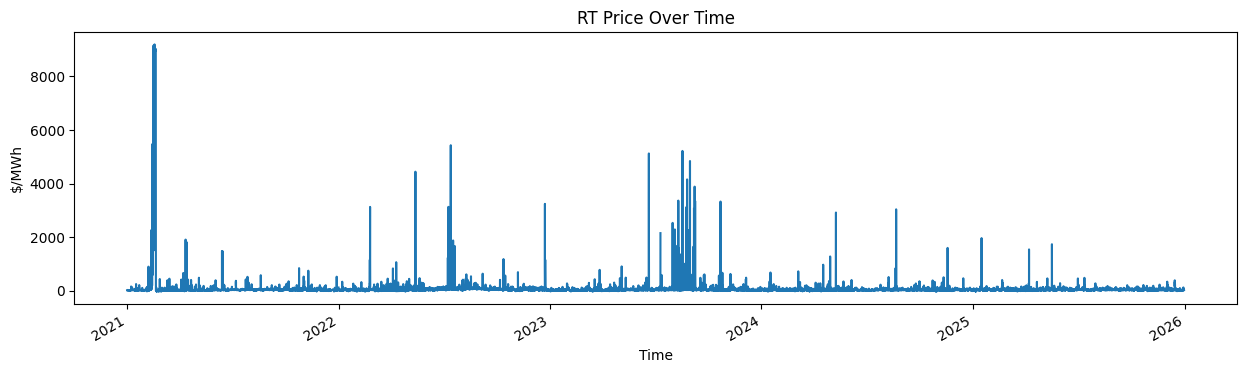

In [12]:
# Price patterns

fig, ax = plt.subplots(figsize=(15, 4))
fig.patch.set_facecolor('white')
df.plot(x='timestamp', y='RT_price', ax=ax, legend=False)
ax.set_title('RT Price Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('$/MWh')
plt.savefig(PROJECT_PATH + 'images/rt_price_over_time.png', bbox_inches='tight', dpi=150, facecolor='white')

In [11]:
plt.savefig(PROJECT_PATH + 'images/rt_price_over_time.png', bbox_inches='tight', dpi=150)

<Figure size 640x480 with 0 Axes>

In [ ]:
# Regime

# Negative prices — confirms "Low" regime
print('Min RT:', df['RT_price'].min())
print('Negative hours:', (df['RT_price'] < 0).sum())

Min RT: -37.8475
Negative hours: 4005


Text(0, 0.5, '$/MWh')

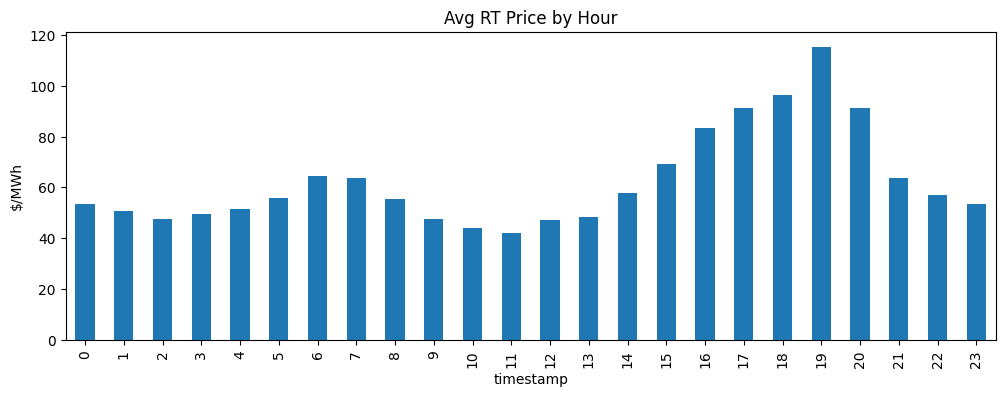

In [ ]:
# Avg RT price by hour of day

df.groupby(df['timestamp'].dt.hour)['RT_price'].mean().plot(kind='bar', figsize=(12,4), title='Avg RT Price by Hour')
plt.ylabel('$/MWh')

Text(0, 0.5, '$/MWh')

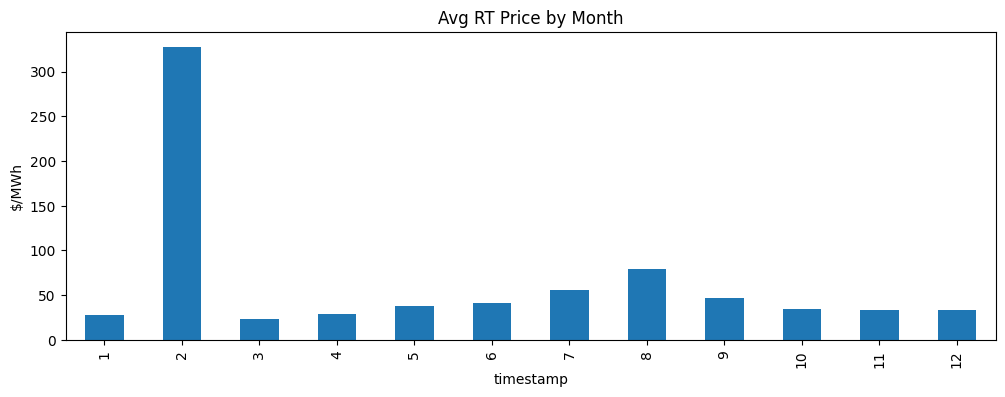

In [ ]:
# Avg price by month (including Uri)
df.groupby(df.timestamp.dt.month)['RT_price'].mean().plot(kind='bar', figsize=(12,4), title= 'Avg RT Price by Month')
plt.ylabel('$/MWh')

Text(0, 0.5, '$/MWh')

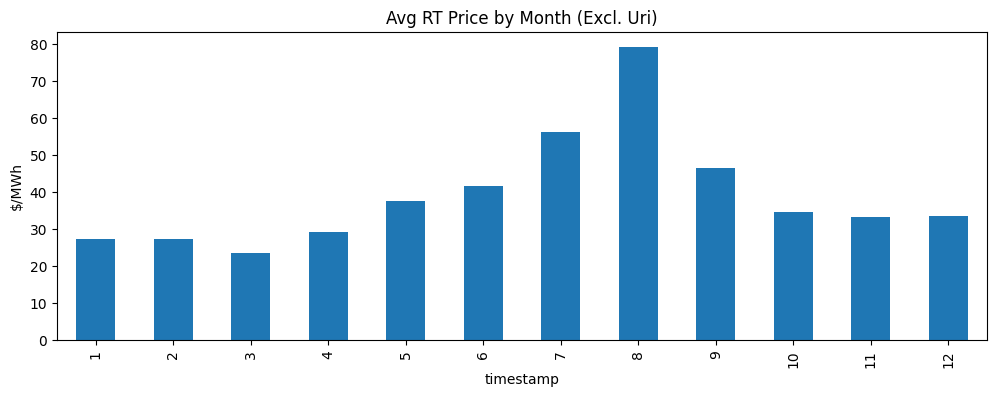

In [ ]:
# Avg price per month (excluding Uri)
mask = ~((df['timestamp'].dt.year == 2021) & (df['timestamp'].dt.month == 2))
df[mask].groupby(df[mask]['timestamp'].dt.month)['RT_price'].mean().plot(kind='bar', figsize=(12,4), title='Avg RT Price by Month (Excl. Uri)')
plt.ylabel('$/MWh')

## RT Price Correlations

Below shows some features with low correlation. This doesn't mean useless features, it just means the relationship is non-linear. Correlation tests for linear relationships.
This is precisely why using tree based models is a good idea, to pick up on non-linear relationships. 

<Axes: title={'center': 'Correlation with RT Price'}>

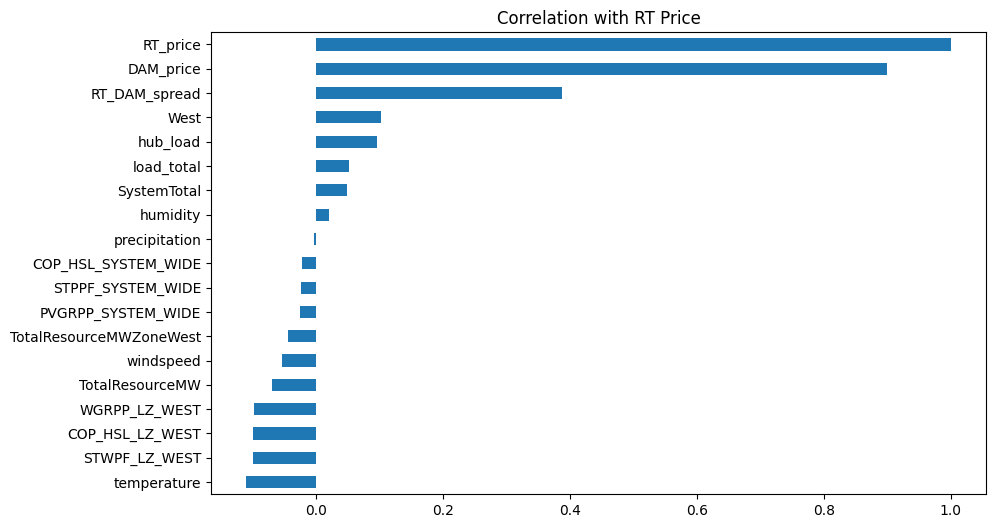

In [35]:
# Correlations with RT price
df.corr(numeric_only=True)['RT_price'].sort_values().plot(kind='barh', figsize=(10,6), title='Correlation with RT Price')

## Price Distribution

This will let us know what price thresholds to design the regime labels around.

Text(0.5, 0, '$/MWh')

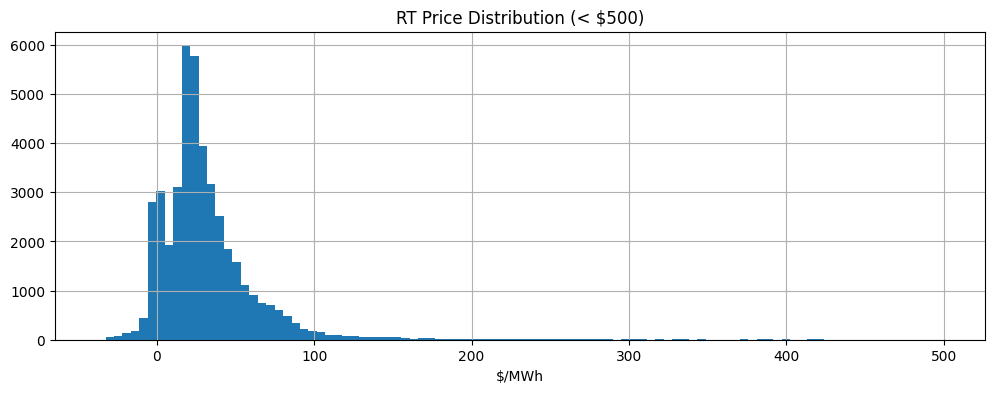

In [ ]:
# RT price distribution — Clipped at 500 to see the majority of distribution

df[df['RT_price'] < 500]['RT_price'].hist(bins=100, figsize=(12,4))
plt.title('RT Price Distribution (< $500)')
plt.xlabel('$/MWh')

In [37]:
df['RT_price'].quantile([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.05     -2.377625
0.10      0.225000
0.25     14.630000
0.50     24.780000
0.75     41.615000
0.90     68.685250
0.95     89.657750
0.99    395.556500
Name: RT_price, dtype: float64

## Regime Labels

Based on findings, we can have the following regime labels. 

1. Low: < $0 (~5% of hours) — oversupply, cheap power
2. Normal: $0 - $75 (~90% of hours) — typical operations
3. Tight: $75 - $300 (~4% of hours) — grid stressed, consider reducing
4. Scarcity: > $300 (~1% of hours) — curtail

Note: The label thresholds can be adjusted depending on business need and objective. Ex (datacenter strategy vs battery storage vs btc mining)

<Axes: title={'center': 'Load vs RT Price'}, xlabel='load_total', ylabel='RT_price'>

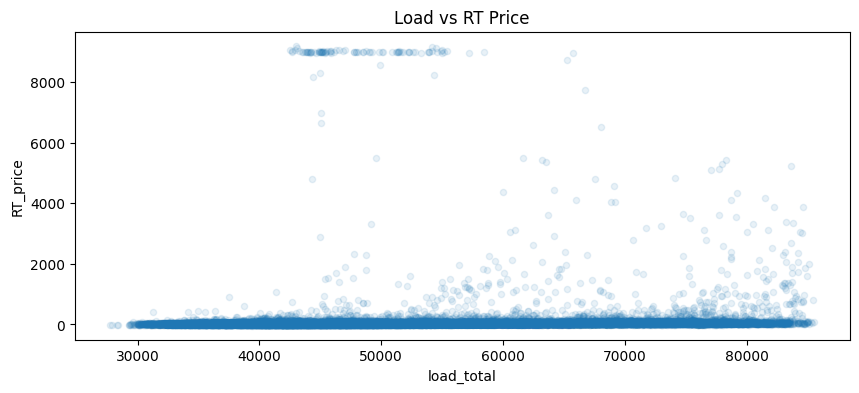

In [ ]:
# Load/wind/solar impact on RT price

# Scatter: load vs price
df.plot.scatter(x='load_total', y='RT_price', alpha=0.1, figsize=(10,4), title='Load vs RT Price')

Based on above. Winter Storm Uri can be seen (~$9000 prices having load ~45,000 MW). Most notably, high load alone isn't responsible for scarcity. We can see high RT prices throughout the plot at different load amounts.  
High load combined with outages and low supply causes scarcity. Need to combine with outage and renewable data.  

<Axes: title={'center': 'Wind Production vs RT Price'}, xlabel='WGRPP_LZ_WEST', ylabel='RT_price'>

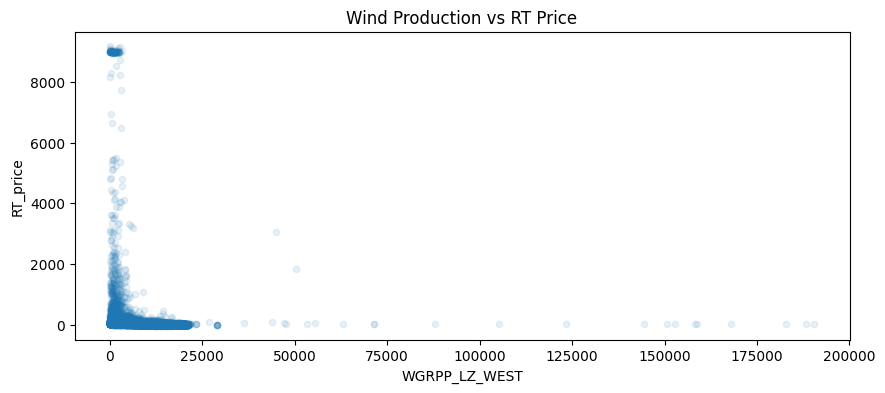

In [39]:
# Scatter: wind vs price
df.plot.scatter(x='WGRPP_LZ_WEST', y='RT_price', alpha=0.1, figsize=(10,4), title='Wind Production vs RT Price')

When wind production is high, prices stay flat near zero. All the price spikes happen when wind is low. 

Wind suppresses prices — more wind means cheaper power. Price spikes happen with low wind. 

## Wind Data issues:

Two data issues in wind - fix in Feature Engineering

1. Nov 6, 2022: 8 duplicate rows for the same timestamp (DST fall-back hour). Missed in data cleaning. 
2. Aug 20-21, 2024: Values ramping from 47K to 190K MW — clearly corrupted data. ERCOT West wind capacity is ~30 GW max.

Fix -- Set limit to cap at 99th percentile in feature engineering.

In [43]:
print(df['WGRPP_LZ_WEST'].quantile([0.95, 0.99, 1.0]))

0.95     16200.355
0.99     19604.667
1.00    190508.800
Name: WGRPP_LZ_WEST, dtype: float64


In [42]:
print(df[df['WGRPP_LZ_WEST'] > 25000].shape)
print(df[df['WGRPP_LZ_WEST'] > 25000][['timestamp', 'WGRPP_LZ_WEST']].head(20))

(32, 20)
                timestamp  WGRPP_LZ_WEST
16181 2022-11-06 02:00:00        28913.7
16182 2022-11-06 02:00:00        28913.7
16183 2022-11-06 02:00:00        28913.7
16184 2022-11-06 02:00:00        28913.7
16185 2022-11-06 02:00:00        28913.7
16186 2022-11-06 02:00:00        28913.7
16187 2022-11-06 02:00:00        28913.7
16188 2022-11-06 02:00:00        28913.7
31923 2024-08-20 16:00:00        47729.6
31924 2024-08-20 17:00:00        47120.0
31925 2024-08-20 18:00:00        43889.6
31926 2024-08-20 19:00:00        45051.2
31927 2024-08-20 20:00:00        50321.6
31928 2024-08-20 21:00:00        55476.8
31929 2024-08-20 22:00:00        88030.4
31930 2024-08-20 23:00:00       123243.2
31931 2024-08-21 00:00:00       158672.0
31932 2024-08-21 01:00:00       188321.6
31933 2024-08-21 02:00:00       190508.8
31934 2024-08-21 03:00:00       182742.4


<Axes: title={'center': 'Solar Production vs RT Price'}, xlabel='PVGRPP_SYSTEM_WIDE', ylabel='RT_price'>

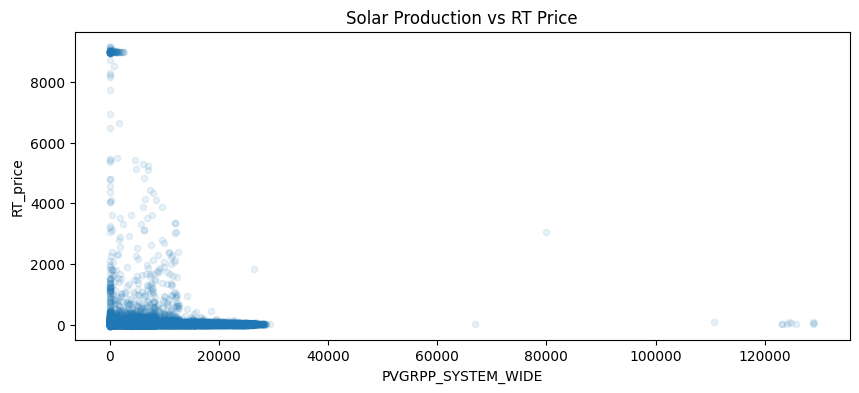

In [40]:
df.plot.scatter(x='PVGRPP_SYSTEM_WIDE', y='RT_price', alpha=0.1, figsize=(10,4), title='Solar Production vs RT Price')

In [44]:
print(df['PVGRPP_SYSTEM_WIDE'].quantile([0.95, 0.99, 1.0]))

0.95     18378.420
0.99     24688.925
1.00    129099.300
Name: PVGRPP_SYSTEM_WIDE, dtype: float64


## Wind & Solar vs RT Price
Both show same pattern: high renewable production leads to low RT prices. 
All major spikes occur during low wind/solar output. Non-linear relationship — tree-based model will capture this.

Outliers found in both (values 5-10x above 99th percentile). Cap at 99th percentile in feature engineering.

## Outages Data

Graph below shows outages alone not correlated with RT price. High outages during low-demand times don't stress the grid. Outages during high demand is what causes grid stress. 

This helps reconfirm that our model needs outages + load + renewables together - and how a tree based model helps pick up those relationships. 

<Axes: title={'center': 'System Outages vs RT Price'}, xlabel='TotalResourceMW', ylabel='RT_price'>

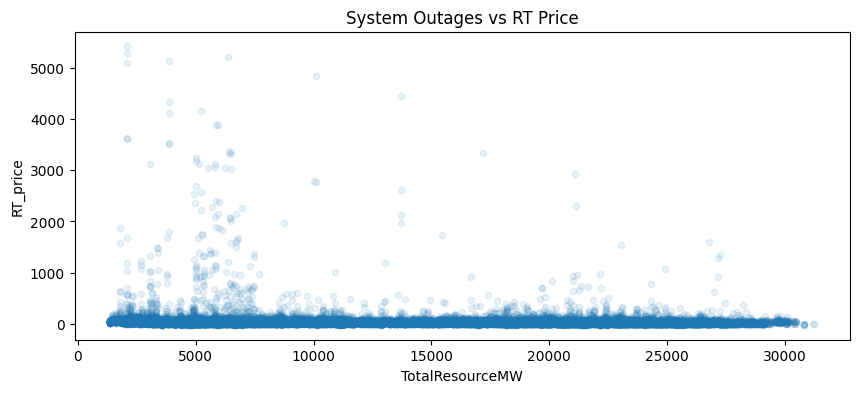

In [45]:
df.plot.scatter(x='TotalResourceMW', y='RT_price', alpha=0.1, figsize=(10,4), title='System Outages vs RT Price')